![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import mean_squared_error
%matplotlib inline
from xgboost import XGBRegressor
import matplotlib.pyplot as plt



In [ ]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


<Axes: >

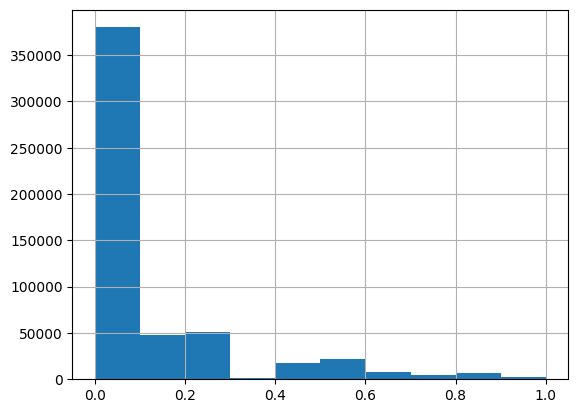

In [ ]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [ ]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [ ]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [ ]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 1
#todo minusculas
vect_A = CountVectorizer(lowercase=True)
X_dtm_A_train = vect_A.fit_transform(X_train)
X_dtm_A_test = vect_A.transform(X_test)


In [ ]:
X_dtm_A_train.shape

(362779, 141176)

In [ ]:
model_1 = XGBRegressor()
model_1.fit(X_dtm_A_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:

y_pred_1 = model_1.predict(X_dtm_A_test)
mse_1 = mean_squared_error(y_test, y_pred_1)
print('MSE:',mse_1)

MSE: 0.020749476727491955


**Comentarios**:

En este primer punto, se trata de predecir si un comentario es tóxico basado en el contenido del texto usando la funcion Count Vectorizer.

Esta función convierte un texto en una repesentación númerica que se basa en la ocurrencia de palabras en el texto. 

En este caso, usamos el lowercase=True, para así manejar todas las pálabras de la misma manera sin depender si fueron escritas con mayuscula o miniscula.

Luego de aplicar el Count Vectorizer a X_train, se hace lo mismo a X_test. Luego aplicamos un XGBRegressor, como algoritmo de gradient boosting, para determinar si los comentarios son tóxicos. En este modelo vemos un MSE de 0.21 que nos indica un desempeño del modelo que vamos a comparar más adelante.

## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

**OPCION 1**




In [ ]:
# Celda 2
vect_B = CountVectorizer(lowercase=True,ngram_range=(3,3))
X_dtm_B_train = vect_B.fit_transform(X_train)
X_dtm_B_test = vect_B.transform(X_test)


In [ ]:
X_dtm_B_train.shape

(362779, 10546378)

In [ ]:
model_2 = XGBRegressor()
model_2.fit(X_dtm_B_train,y_train)
y_pred_2 = model_2.predict(X_dtm_B_test)
mse_2_op1 = mean_squared_error(y_test, y_pred_2)
print('MSE opcion 1:',mse_2_op1)

MSE opcion 1: 0.03663440486459287


**OPCION 2**

In [ ]:
# Celda 2
vect_B = CountVectorizer(lowercase=True,ngram_range=(1,3))
X_dtm_B_train = vect_B.fit_transform(X_train)
X_dtm_B_test = vect_B.transform(X_test)


In [ ]:
X_dtm_B_train.shape

(362779, 14221994)

In [ ]:
model_2 = XGBRegressor()
model_2.fit(X_dtm_B_train,y_train)
y_pred_2 = model_2.predict(X_dtm_B_test)
mse_2_op2 = mean_squared_error(y_test, y_pred_2)
print('MSE opcion 2:',mse_2_op2)

MSE opcion 2: 0.020656004628689325


**Comentarios**:

Para el punto número 2, vamos a utilizar la misma función de Count Vectorizer pero ahora tendremos en cuenta los trigramas. Esto se hace para tener en cuenta los patrones y relaciones de palabras consecutivas en el texto, lo cual puede ayudar a mejorar la precisión. Para esto utilizamos dos opciones:
* Por un lado tenemos la opcion 'ngram_range=(3, 3)' donde solo se consideran trigramas.
* El otro caso tenemos 'ngram_range=(1, 3)' donde se pueden ver unigramas, biogramas y trigramas.

Aplicando el mismo modelo de XGBRegressor, podemos ver que en el caso de solo trigramas obtenemos un MSE de 0.036 y al adicionar unigramas y bigramas vemos una mejora del MSE a 0.021. Hasta ahora, este procesamiento de datos es el que mejor resultado tiene.

## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

TfidfVectorizer es una técnica de tokenización que utiliza la frecuencia inversa de un texto y crea una representación vectorial de los textos de entrada. 

La diferencia con CountVectorizer (cuenta la frecuencia de cada palabra), TfidfVectorizer tiene en cuenta tanto la frecuencia de una palabra en un texto como la frecuencia con la que aparece en un conjunto de textos.

La técnica Tfidf se compone de dos partes:

* **Frecuencia de término (tf)**: es la frecuencia con la que una palabra específica aparece en un texto. Cuanto mayor sea la frecuencia, más importante se considera la palabra para el texto.

* **Frecuencia inversa de documento (idf):** es una medida de la rareza de una palabra en todo el conjunto de textos. Se calcula como el logaritmo del número total de textos dividido por el número de textos en los que aparece la palabra. 

> $$ idf(t, d, D) = log \frac{ \mid \text{ } D \text{ } \mid }{ 1 + \mid \{ d : t \in d \} \mid } $$ \


El resultado final se obtiene multiplicando tf y idf, este valor indica qué tan informativa es la palabra para el conjunto de textos.

> $$\text{tf-idf}(t, d, D) = \text{tf}(t, d) \times \text{idf}(t, d, D)$$ \


Teniendo en cuenta lo anterior, la representación vectorial de TfidfVectorizer es una matriz en la que cada fila hay un texto y cada columna una palabra. Los valores en la matriz son las puntuaciones idf para cada palabra en cada texto.

**Las ventajas de TfidfVectorizer sobre CountVectorizer son:**

**1.** Considera la ***importancia relativa*** de cada palabra en lugar de  contar la frecuencia de cada palabra.

**2.** Reduce la importancia de las palabras comunes que aparecen en muchos textos y aumenta la importancia de las palabras raras que son más informativas para la ***comprensión del contenido***.

**3.** Es más adecuado para textos largos y conjunto de textos grandes.

**Desventajas**

**1.**Requiere más tiempo de procesamiento y más recursos computacionales que CountVectorizer.

**2.**Es menos efectivo en la detección de similitudes entre textos cortos.


## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 4
from sklearn.feature_extraction.text import TfidfVectorizer
vect_C = TfidfVectorizer(lowercase=True)
X_dtm_C_train = vect_C.fit_transform(X_train)
X_dtm_C_test = vect_C.transform(X_test)


In [ ]:
X_dtm_C_train.shape

(362779, 141176)

In [ ]:
model_3 = XGBRegressor()
model_3.fit(X_dtm_C_train,y_train)
y_pred_3 = model_3.predict(X_dtm_C_test)
mse_3 = mean_squared_error(y_test, y_pred_3)
print('MSE:',mse_3)

MSE: 0.020343818478258637


**Comentarios**:

En el punto 4, estamos utilizando la funcion TfidfVectorizer, que como fue explicado en el punto pasado, mira tanto la ocurrencia de una palabra en el texto, como también en todo el conjunto de textos.

De nuevo con el modelo XGBRegressor, obtenemos el mejor resultados hasta el momento con un MSE de 0.20.

## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

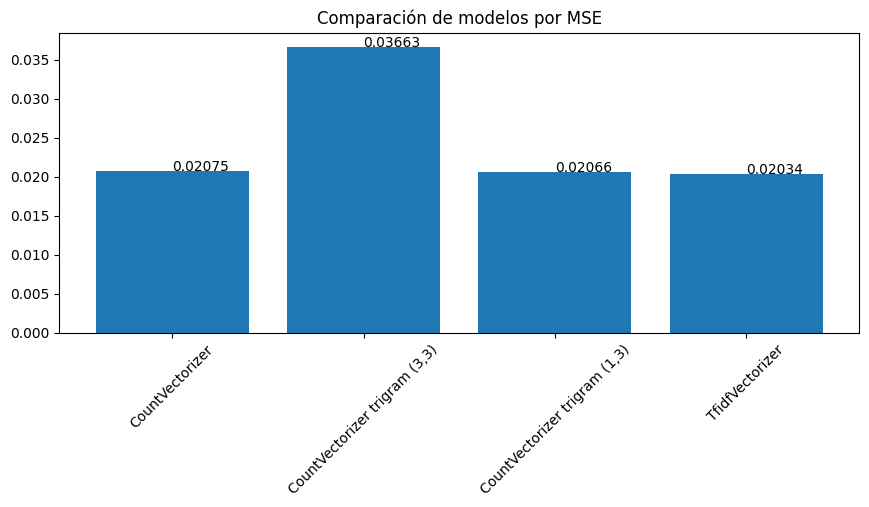

In [ ]:
# Celda 5
fig = plt.figure(figsize=[8,3])
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos por MSE")
#faltan los de filtrado
ejeX = ['CountVectorizer','CountVectorizer trigram (3,3)','CountVectorizer trigram (1,3)','TfidfVectorizer']
ejeY = [mse_1,mse_2_op1,mse_2_op2,mse_3]
ejeY = [round(v,5) for v in ejeY]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.xticks(rotation = 45)
plt.show()

Al evaluar las diferentes técnicas de tokenización con un mismo modelo, podemos comparar los resultados, utilizando el MSE como métrica. A continuación veremos las diferentes formas de preprocesamiento de texto como afectan el desempeño. 

**Desempeño de la función de CountVectorizer:**
1. Al especificar ngram_range=(3,3) para definir trigramas. limita la partición del texto.
2. CountVectorizer con ngram_range=(1,3) en el que recorre unigramas, bigramas o trigramas. 
3. CountVectorizer sin especificar ngram_range

los resultados CountVectorizer usando combinanciones (CountVectorizer sin especificar ngram_range o CountVectorizer con ngram_range=(1,3) ) los resultados de MSE son similares por lo que generan valor , al definir si existen frases o palabras claves en los comentarios para identificar si estos son tóxicos.

**Desempeño de la función de TfidfVectorizer:**

con respecto a las funciones y parametros usuados en la función de CountVectorizer, se evidencia que TfidfVectorizer presenta un mejor desempeño del modelo con el MSE más bajo en la indentificación de comentarios toxicos,  sin embargo al especificar los ngram_range en CountVectorizer, los resultados son similares, por lo tanto  es importante estudiar tanto los textos por separado, como todo el conjunto de textos, ya que cualquier función presenta un buen desempeño, se debe considerar el redimiento computacional y el tamaño de los textos al momento de elegir. 
